In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

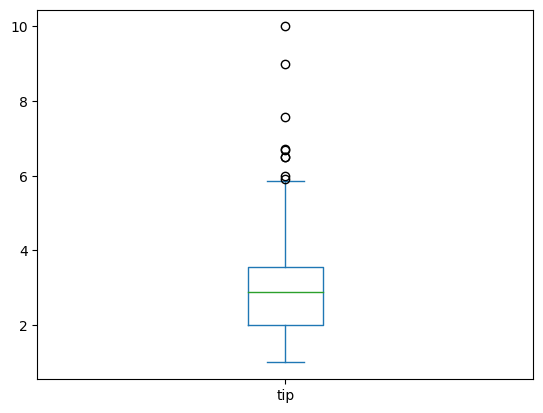

In [9]:
df['tip'].plot(kind='box')

<Axes: >

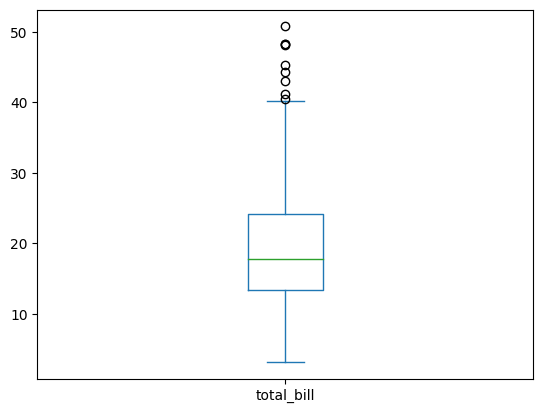

In [10]:
df['total_bill'].plot(kind='box')

<Axes: >

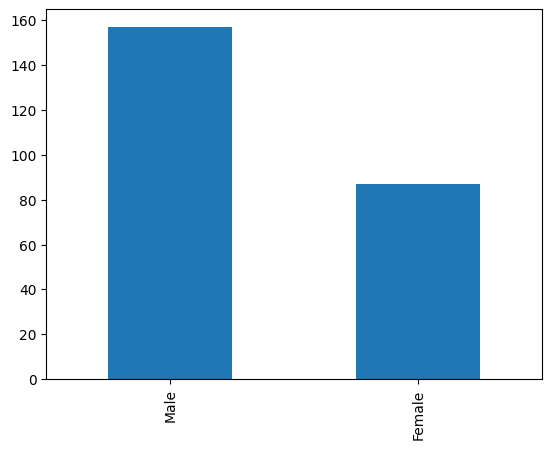

In [11]:
df['sex'].value_counts().plot(kind='bar')

<Axes: >

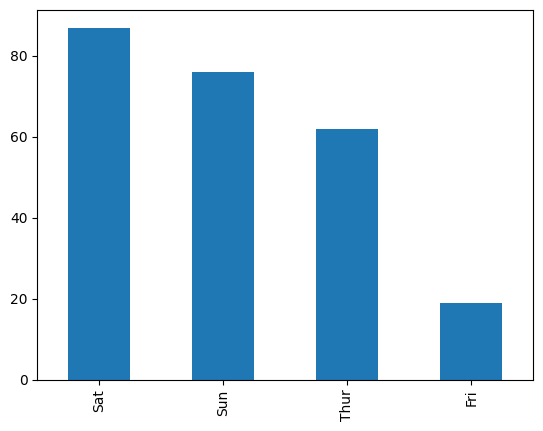

In [12]:
df['day'].value_counts().plot(kind='bar')

<Axes: >

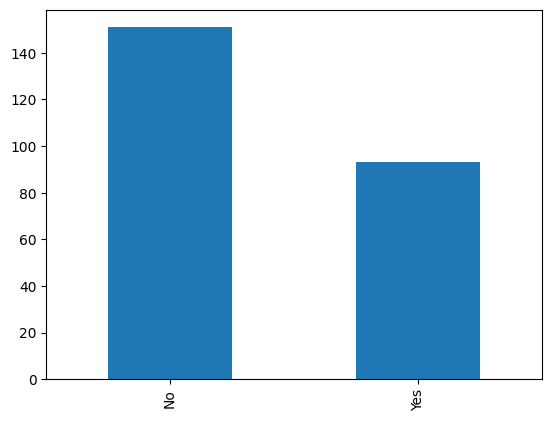

In [13]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: >

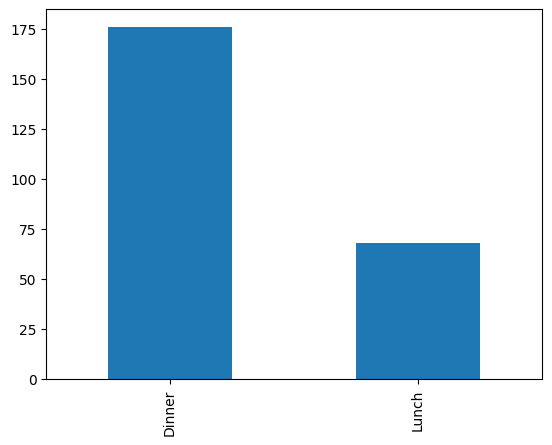

In [14]:
df['time'].value_counts().plot(kind='bar')

<Axes: xlabel='total_bill', ylabel='tip'>

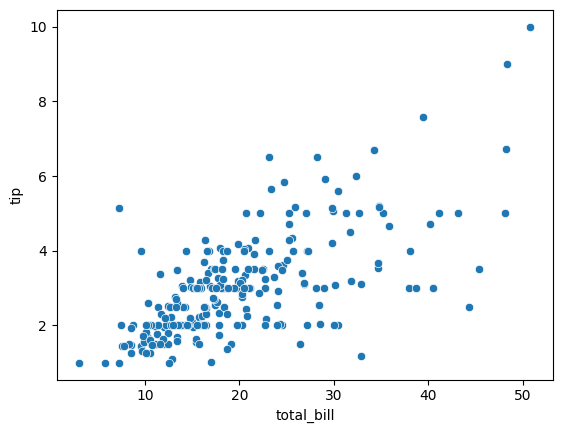

In [15]:
sns.scatterplot(x='total_bill',y='tip',data=df)

In [16]:
X=df.drop('tip',axis=1)
y=df['tip']

**Train Test Split**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Preparing Training Data**

In [18]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
cat_col=['sex','smoker','day','time']
ohe=OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_tf=ohe.fit_transform(X_train[cat_col]).toarray()
X_train_cat_tf

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [19]:
num_col=['total_bill','size']
std=StandardScaler()
X_train_num_tf=std.fit_transform(X_train[num_col])
X_train_num_tf

array([[ 7.32409144e-01,  1.48790007e+00],
       [ 1.36827467e+00, -6.22212755e-01],
       [-2.53182426e-01, -6.22212755e-01],
       [ 3.18607423e-02, -6.22212755e-01],
       [ 3.06647416e+00,  3.59801289e+00],
       [-1.16203160e+00, -6.22212755e-01],
       [-8.95625874e-01, -6.22212755e-01],
       [ 1.06678671e+00,  1.48790007e+00],
       [ 5.37871398e-02,  1.48790007e+00],
       [-6.51146542e-01, -6.22212755e-01],
       [-8.26557722e-01, -6.22212755e-01],
       [ 7.76261939e-01, -6.22212755e-01],
       [-4.81216960e-01, -6.22212755e-01],
       [ 1.05314174e-01, -6.22212755e-01],
       [ 5.26301007e-01,  1.48790007e+00],
       [ 1.08980942e+00,  1.48790007e+00],
       [-5.11913917e-01, -6.22212755e-01],
       [-4.08859849e-01,  4.32843655e-01],
       [ 1.38471947e+00, -6.22212755e-01],
       [-1.08200025e+00,  4.32843655e-01],
       [ 9.61539999e-01, -6.22212755e-01],
       [-5.28358715e-01, -6.22212755e-01],
       [-1.06226650e+00, -6.22212755e-01],
       [ 4.

In [20]:
X_train_tf=np.hstack((X_train_cat_tf,X_train_num_tf))
X_train_tf

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.73240914,  1.48790007],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.36827467, -0.62221275],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.25318243, -0.62221275],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        -1.04691802, -0.62221275],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         1.33757772,  1.48790007],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.41966678, -0.62221275]])

**Preparing Testing Data**

In [21]:
X_test_cat_tf=ohe.transform(X_test[cat_col]).toarray()
X_test_num_tf=std.transform(X_test[num_col])
X_test_tf=np.hstack((X_test_cat_tf,X_test_num_tf))
X_test_tf[:5]

array([[ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.28607202,  0.43284366],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.20932963,  1.48790007],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.07777125, -0.62221275],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -1.41966678, -1.67726916],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.43078625, -0.62221275]])

In [22]:
import mlflow

In [23]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Iris Species Prediction")

<Experiment: artifact_location='file:///C:/Users/E Alekhya/mlruns/1', creation_time=1683479927099, experiment_id='1', last_update_time=1683479927099, lifecycle_stage='active', name='Iris Species Prediction', tags={}>

In [24]:
from pickle import dump

dump(std, open('models/std.pkl', 'wb'))

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [26]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "LinearRegression")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    lr=LinearRegression()
    lr.fit(X_train_tf, y_train)
    y_test_pred=lr.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")

C:\Users\E Alekhya\anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [27]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "DecisionTree")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    dt=DecisionTreeRegressor(random_state=0)
    dt.fit(X_train_tf,y_train)
    y_test_pred=dt.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")

In [28]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "SVM")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    svr=SVR()
    svr.fit(X_train_tf,y_train)
    y_test_pred=svr.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")

In [29]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "GradientBoost")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    grb= GradientBoostingRegressor(n_estimators =100,random_state =0) 
    grb.fit(X_train_tf, y_train) 
    y_test_pred = grb.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")

In [30]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "RandomForest")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    rf=RandomForestRegressor(n_estimators=100)
    rf.fit(X_train_tf,y_train)
    y_test_pred=rf.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")

In [31]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Alekhya")
    mlflow.set_tag("algo", "AdaBoost")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/tips.csv")
    ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
    ada.fit(X_train_tf,y_train)
    y_test_pred=ada.predict(X_test_tf)
    mse=mean_squared_error(y_test,y_test_pred).round(4)
    rmse=np.sqrt(mse).round(4)
    mlflow.log_metric("RMSE", rmse)
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/std.pkl")